In [1]:
# Remove warnings
import warnings

warnings.filterwarnings('ignore')

# Data manipulation 
import pandas as pd
# Dates handling
from datetime import datetime, timedelta
# Chart modules
import matplotlib.pyplot as plt

# Linear algrebra
import numpy as np


# Technical indicators
from ta.trend import ema_indicator, trix, dpo
from ta.momentum import stochrsi
from ta.volatility import average_true_range
from modules.Utils.utils import loadFromDB, computeFutureLinearRegression, strategyTester
from modules.Utils.indicators import computeLaggingLinearRegression, computeTrixIndicator, addIndicators, computeRSI_VWAP, computeMASlope, computeSuperTrend



In [2]:
SYMBOL= 'BTC'
df = loadFromDB(SYMBOL,'1h')
df.head()

,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2020-06-01 00:00:00,9448.27,9508.57,9421.67,9498.31,1742.125917,1590969600
2020-06-01 01:00:00,9498.78,9570.00,9465.30,9551.58,2064.378210,1590973200
2020-06-01 02:00:00,9551.17,9568.61,9526.87,9530.67,1984.956728,1590976800
2020-06-01 03:00:00,9531.70,9571.66,9514.65,9555.79,1620.638978,1590980400
2020-06-01 04:00:00,9556.14,9619.00,9541.96,9549.02,2787.512219,1590984000


In [3]:
df_day = loadFromDB(SYMBOL,'1d')
df_day = computeSuperTrend(df_day)
df_day.dropna(inplace=True)
df_day.tail()

,Open,High,Low,Close,Volume,Timestamp,ST_Direction
Date,,,,,,,
2022-10-20,19123.35,19347.82,18900.00,19041.92,223530.13068,1666224000,False
2022-10-21,19041.92,19250.00,18650.00,19164.37,269310.75769,1666310400,False
2022-10-22,19164.37,19257.00,19112.72,19204.35,110403.90837,1666396800,False
2022-10-23,19204.29,19695.00,19070.11,19570.40,167057.20184,1666483200,False
2022-10-24,19570.40,19601.15,19250.59,19274.00,82354.94042,1666569600,False


In [4]:
df['EMA1']=ema_indicator(close=df['Close'], window=7)
df['EMA2']=ema_indicator(close=df['Close'], window=30)
df['EMA3']=ema_indicator(close=df['Close'], window=50)
df['EMA4']=ema_indicator(close=df['Close'], window=100)
df['EMA5']=ema_indicator(close=df['Close'], window=121)
df['EMA6']=ema_indicator(close=df['Close'], window=200)

df['STOCH_RSI'] = stochrsi(close=df['Close'], window=14, smooth1=3, smooth2=3)
df = computeSuperTrend(df)
def addST(x):
    try:
        return df_day.loc[pd.to_datetime(x.name).date().strftime("%Y-%m-%d")].ST_Direction.values[0]
    except:
        return np.nan
    
df['ST_day'] = df.apply(addST,axis=1)
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume,Timestamp,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,STOCH_RSI,ST_Direction,ST_day
Date,,,,,,,,,,,,,,,
2020-06-01 00:00:00,9448.27,9508.57,9421.67,9498.31,1742.125917,1590969600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2020-06-01 01:00:00,9498.78,9570.00,9465.30,9551.58,2064.378210,1590973200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2020-06-01 02:00:00,9551.17,9568.61,9526.87,9530.67,1984.956728,1590976800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2020-06-01 03:00:00,9531.70,9571.66,9514.65,9555.79,1620.638978,1590980400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2020-06-01 04:00:00,9556.14,9619.00,9541.96,9549.02,2787.512219,1590984000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


Period : [2020-06-01 00:00:00] -> [2022-10-24 07:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 3030.99 $
Performance vs US Dollar : 203.1 %
Buy and Hold Performence : 103.04 %
Performance vs Buy and Hold : 97.1 %
Best trade : +78.97 %, the 2021-01-11 07:00:00
Worst trade : -8.71 %, the 2021-01-15 20:00:00
Worst drawBack : -33.0 %
Total fees :  253.13 $

----- Trades Informations -----
Total trades on period : 58
Number of positive trades : 19
Number of negative trades :  39
Trades win rate ratio : 32.76 %
Average trades performance : 2.91 %
Average positive trades : 15.69 %
Median positive trades : 7.27 %
Average negative trades : -3.32 %
Median negative trades : -2.83 %

----- Plot -----


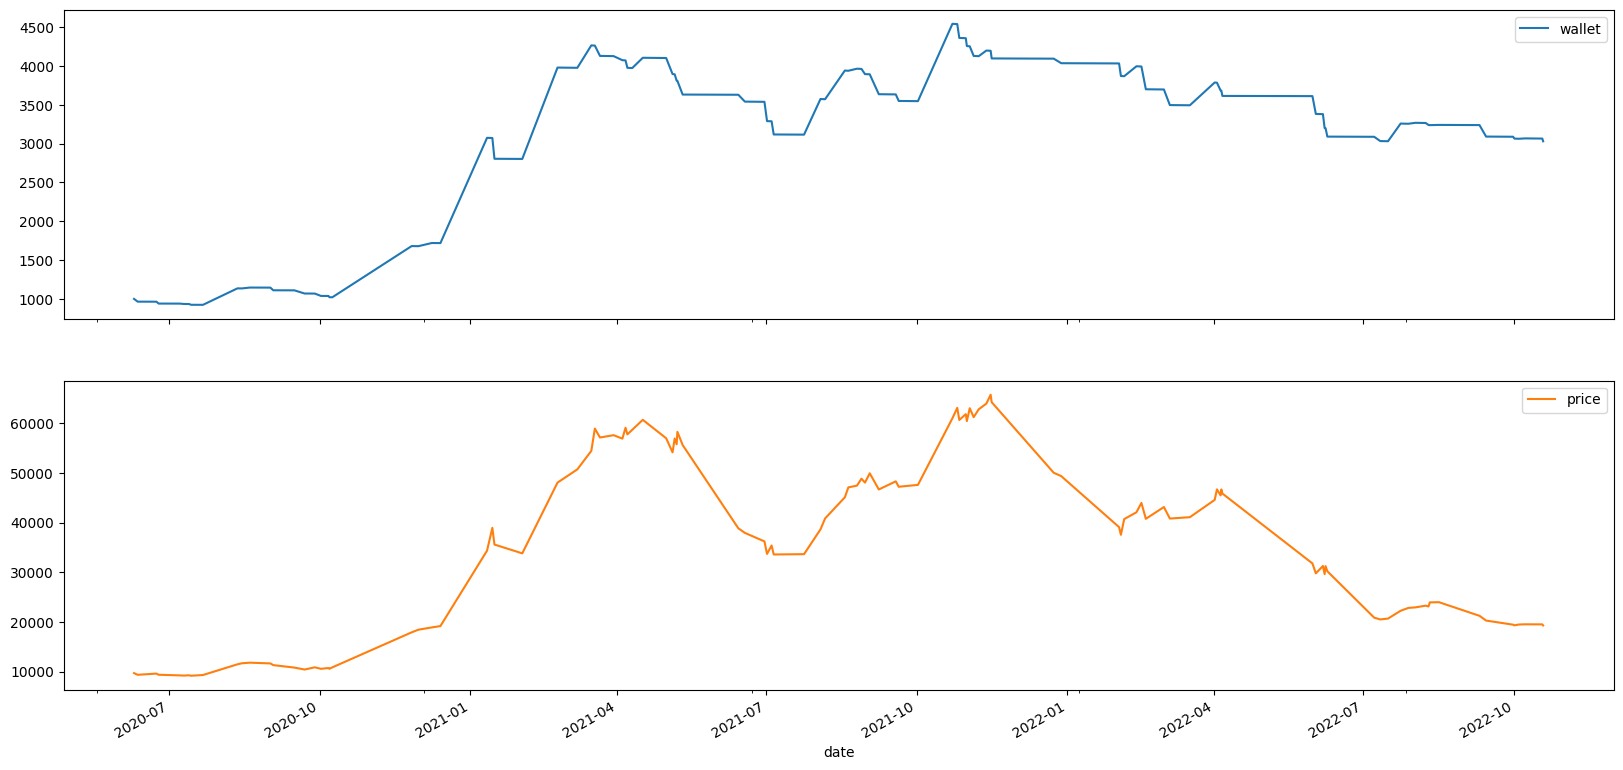

In [5]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row['EMA1'] > row['EMA2'] and
                    row['EMA2'] > row['EMA3'] and
                    row['EMA3'] > row['EMA4'] and
                    row['EMA4'] > row['EMA5'] and
                    row['EMA5']>row['EMA6'] and
                    row['ST_Direction']==True) else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if (row['EMA6'] > row['EMA1'] and
                    row['STOCH_RSI']>0.2) else False

strategyTester(df,buyCondition,sellCondition,equity=1000,)

In [1]:
%pip install kucoin-futures-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from kucoin_futures.client import Trade
client = Trade(key='', secret='', passphrase='', is_sandbox=False, url='')

In [ ]:
import ccxt
exchange = ccxt.kucoinfutures({'apiKey': '', 'secret': '', 'password': ''})
exchange.create_order()